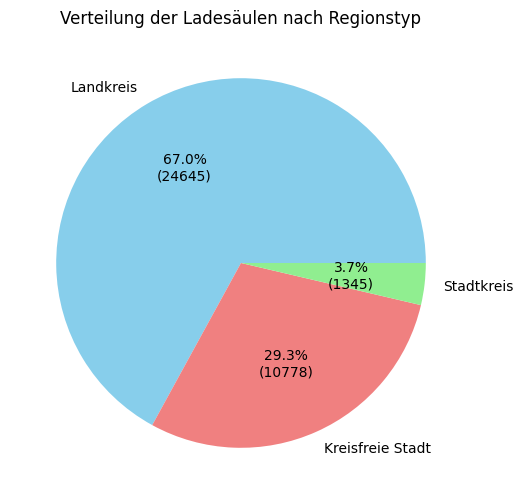

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datensatz einlesen
ladesaeulen_df = pd.read_csv(r'C:\Users\oemer\Downloads\archive (4)\charging_data.csv')

#Region extrahieren
def extract_region(x):
    return x.split()[0]
# Neue temporäre Spalte "Regionstyp" 
ladesaeulen_df['Regionstyp'] = ladesaeulen_df['kreis_kreisfreie_stadt'].apply(extract_region)

# Umschreiben bei der Ausgabe für bessere Übersicht
ladesaeulen_df['Regionstyp'] = ladesaeulen_df['Regionstyp'].replace('Kreisfreie', 'Kreisfreie Stadt')

# Verbindung der Zählungen "Landkreis" und "Kreis" da beide Begriffe im Datensatz benutzt werden, obwohl sie das gleiche sind.
gesamt_count = ladesaeulen_df['Regionstyp'].replace({'Kreis': 'Landkreis'}).value_counts()

# Größe vom Kreisdiagramm
plt.figure(figsize=(10, 6))

# Farben für die Segmente
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Funktion, um absolute Anzahl in Klammern unterhalb der Prozentzahl anzuzeigen
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f'{pct:.1f}%\n({absolute})'

# Kreisdiagramm erstellen
gesamt_count.plot(kind='pie', autopct=lambda pct: func(pct, gesamt_count), colors=colors)

# Diagramm-Titel und Achsenbeschriftungen
plt.title('Verteilung der Ladesäulen nach Regionstyp')
plt.ylabel('')  # Entfernt die standardmäßige Beschriftung der y-Achse

# Diagramm anzeigen
plt.show()
